# Real estate project


In [1]:
import pandas as pd


In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [6]:
housing['RM'].value_counts()

6.405    3
5.713    3
6.167    3
6.127    3
6.229    3
        ..
6.701    1
6.232    1
6.593    1
6.800    1
6.625    1
Name: RM, Length: 446, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A9A2B80>,
      dtype=object)

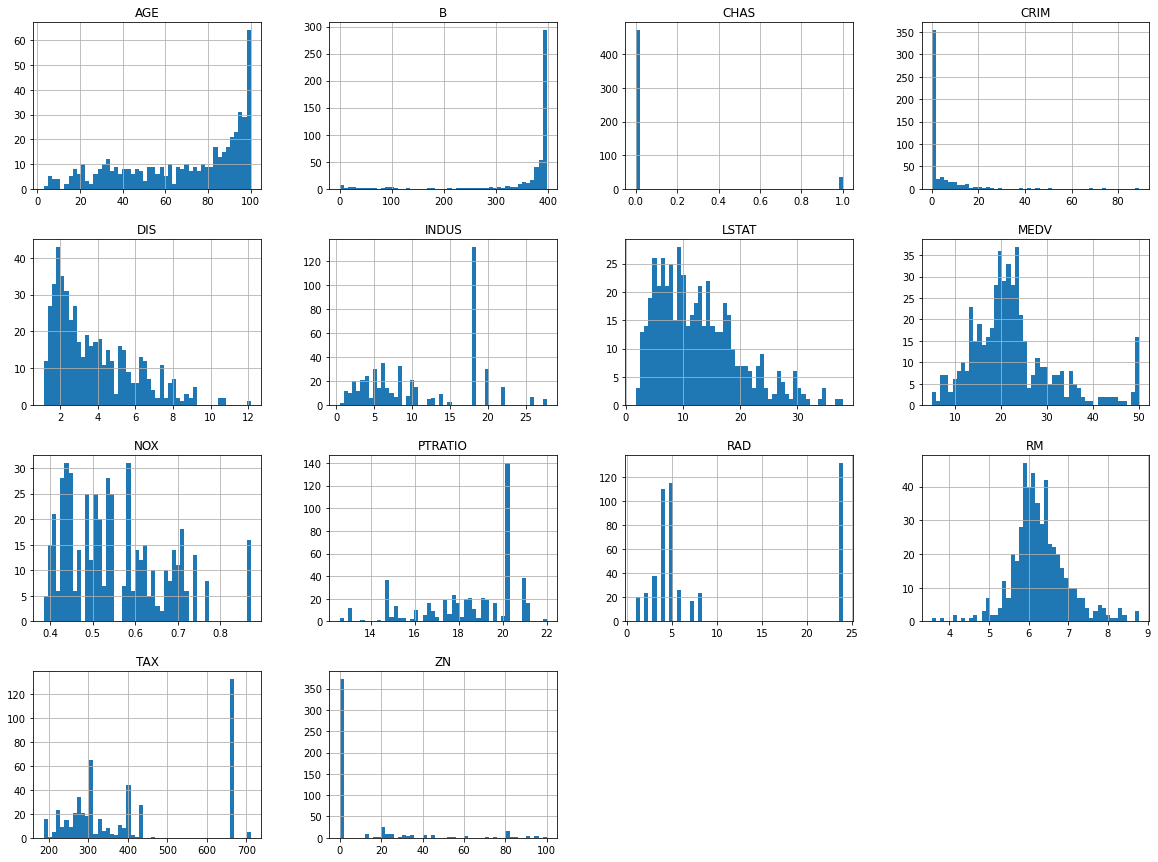

In [10]:
housing.hist(bins=50 , figsize=(20,15))

## Train test splitting


In [11]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)} ")

Rows in train set: 404
Rows in test set: 102 


ho sakta sari values train mai chli jaye test mai bche hi na to uske liye iska istemal krenge


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing ,housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

yaha maksaad ye h ki dono ka ratio same h 

In [14]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
#simply data set ko short kra h ye pipelining k baad yaha aaya hu overfitting se bchne k liye
housing = strat_train_set.copy()

# looking for corelations

In [16]:
corr_matrix = housing.corr()


In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1343FDC0>,
      dtype=object)

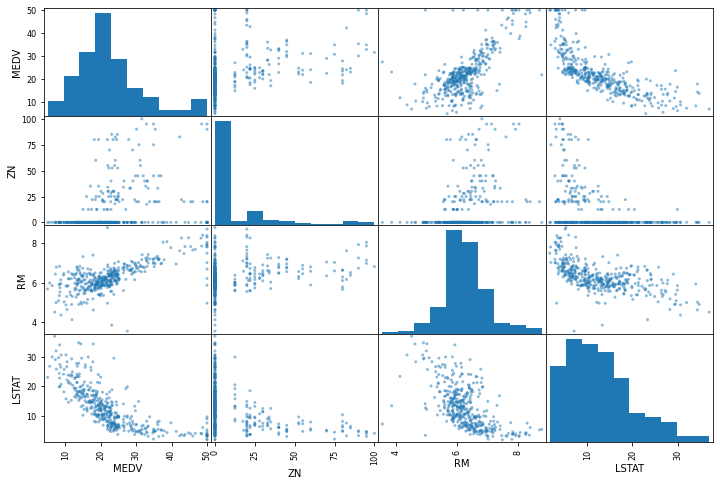

In [18]:
from pandas.plotting import scatter_matrix
#we are looking for corrrelation between these values.
attributes = ["MEDV","ZN","RM","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

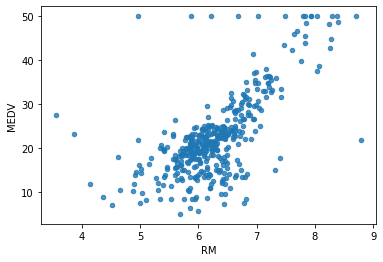

In [19]:
#to see a particular plot
#alpha is the constrat here
housing.plot(kind="scatter" , x="RM",y="MEDV",alpha=0.8)

##corelation matrix is used for the data validation i.e we can remove outer points.


# #now we will try some attribute combinations


#attributes combination is used to improve the data 

In [20]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [21]:
housing["TAXRM"].head()

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
Name: TAXRM, dtype: float64

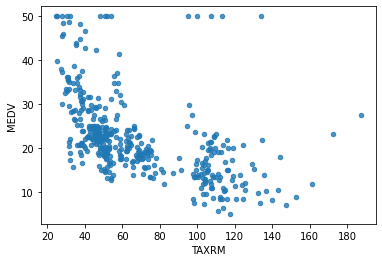

In [22]:
housing.plot(kind="scatter" , x="TAXRM",y="MEDV",alpha=0.8)

In [23]:
#before starting imputer
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.480852
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.457774
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [24]:
#yaha housing or housing label alag kiye h
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# if we have some missing data

#if some values in the dataset are missing 
1.get rid of missing data points
2.delete that attribute.
3.set those missing value to mean,median or zero.

option 1: housing.dropna(subset=["RM"])
option 2: housing.drop("RM",axis =1 )
option 3: median = housing["RM"].median()
    housing["RM"].fillna(median)
#ye sara work imputer khud kr deta h, imputer ek inbuilt class h sklearn

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [26]:
#this command will show all the computed values by imputer for every column
imputer.statistics_.shape

(13,)

#but this code will only execute RM missing values so will make a pipeline for every column to automatic fill the values

In [27]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x,columns=housing.columns)
housing_tr.describe()
#housing_tr transformed dataset h missing values fill
#krne k baad mere missing value thi hi nhi to waise hi rha but in case agar missing value hoti to


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# scikit-learn Design

scikit learn have 3 types of objects
1.Estimator : estimates some parameter based on dataset for ex imputer
2.Transformer
3.Predictor : linear regression model is example of predictor

# creating pipeline 

In [28]:
#pipeline automate krta h series of steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])


In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [30]:
housing_num_tr.shape

(404, 13)

ML model mai sara kaam pipeline mai hona chahiye imputing se lekar aakhir tak

# selecting desired model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = DecisionTreeRegressor()
#model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
#now we give some data through pipeline
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.38 , 25.545, 16.54 , 23.253, 23.601])

In [33]:
list(some_labels)
#values lagbhag aas pass h jaise ki dekha jaye

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating model

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
#lin_mse = mean_squared_error(housing_labels,housing_predictions)
#lin_rmse = np.sqrt(lin_mse)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [35]:
rmse

1.124577398073349

#ye model accha nhi h kyoki jo labels h unke saath error bhout zyaada aa raha h to decision tree istemal kra or ab lin_mse 0 aa gya ab overfitting ho gyi h.
hey ram :(

ab cross validation ka istemal hoga


# using cross validation

data ko group mai baato or baari baari check kro include exclude krke
1 2 3 4 5 6 7 8 9 10
yaha in group mai se ek bar 1 ko chhodd k saare fir 2 ko choodd k sare aise krke mse nikal k dekho

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([2.68424711, 2.81744241, 4.51613861, 2.63537756, 3.4209789 ,
       2.68732409, 4.58774852, 3.27656767, 3.18928218, 3.57822888])

In [38]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [39]:
print_scores(rmse_scores)

Scores:  [2.68424711 2.81744241 4.51613861 2.63537756 3.4209789  2.68732409
 4.58774852 3.27656767 3.18928218 3.57822888]
Mean:  3.3393335930409203
Standard deviation:  0.6823328342572184


we coosed random forest regressor because it fits best now saving the data

In [40]:
from joblib import dump, load
dump(model,'comp.joblib')

['comp.joblib']

# testing data on model

In [41]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [42]:
final_rmse

2.998452110476925